In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
# 1 reading the data: 
df=pd.read_csv('height-weight.csv')

In [212]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [213]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


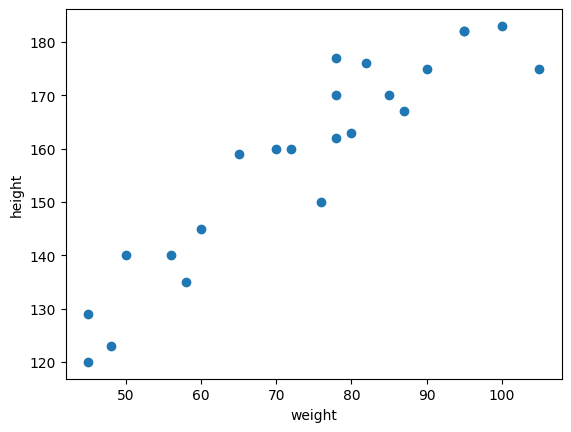

In [214]:
plt.scatter(df.Weight, df.Height)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [215]:
# 2 EDA and data cleaning
# 3 preparing the data and feature engineering

            # these already done

In [216]:
# 4 divide the data into X, y
X=df[['Weight']]  # independet
y=df[['Height']]    # dependent

In [217]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [218]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [219]:
#5 train test split

from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=1)

In [221]:
X_train.shape, X_test.shape

((17, 1), (6, 1))

In [222]:
y_train.shape, y_test.shape

((17, 1), (6, 1))

In [223]:
df.shape

(23, 2)

In [224]:
# 6 scalling the data:>.  
# always scalling should be done after train test split>> because agar ase nhi krte 
#        standridation>>fit_tranform(calculate mu and sigma)>>train
#                       tranform(apply mu and sigma using z score) >>test(unshene data)


In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler=StandardScaler()
# y/target variable should not be scaled
# avoid scalli9ng categorical features

In [227]:
X_train=scaler.fit_transform(X_train) #for train data use fit_transform

In [228]:
X_test=scaler.transform(X_test)#for test use only transform as it is representative of unknown data>> 

In [229]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [230]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

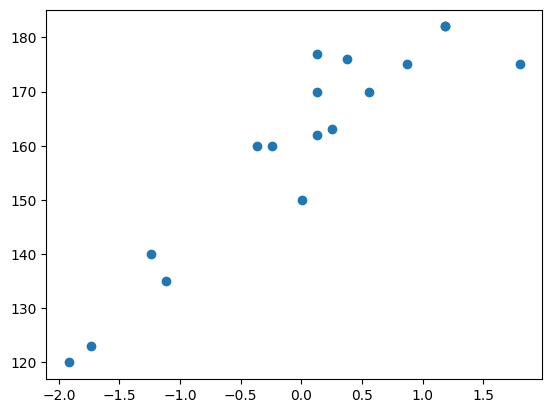

In [231]:
# scalling is optional >> why>> it doen't change the data distribution

plt.scatter(X_train, y_train)

In [232]:
# 7 Model training: 
from sklearn.linear_model import LinearRegression

In [233]:
# Linear regression parameter: 

# fit_intercept>> the best fit line will have intercept >> by default it is true
# copy_x>> copy the origional X_train dta and than build model don't modify origional data > by default true
# n_jobs>> processor you want to use >> -1 all processor use 
# positive>> you want all of the coficint to be positive

# after building the model >> you have attributes of the model

 # coef(theta 1)
 # intercept(theta 0)


In [234]:
regressor=LinearRegression()

In [235]:
regressor

LinearRegression()

In [236]:
# trainging of the model
regressor.fit(X_train,y_train )

LinearRegression()

In [237]:
print("the slope or coef of model", regressor.coef_)
print("the intercept of the mode is", regressor.intercept_)

the slope or coef of model [[17.7307072]]
the intercept of the mode is [160.]


# prediction on train data

 predicted height output=intercept + coef_*(weights)<br>
y_pred_train=160+17.74*(X_train)


# prediction on test data:
 
predicted height output=intercept + coef_*(weights)<br>
y_pred_test=160+17.74*(X_test)


In [238]:
# prediction of train data
y_pred_train=regressor.predict(X_train)

In [239]:
y_pred_train

array([[166.65863288],
       [153.47066096],
       [129.29271243],
       [160.06464692],
       [164.46063756],
       [175.45061417],
       [140.28268904],
       [169.95562586],
       [125.99571945],
       [162.26264224],
       [155.66865628],
       [138.08469371],
       [162.26264224],
       [180.94560247],
       [191.93557907],
       [180.94560247],
       [162.26264224]])

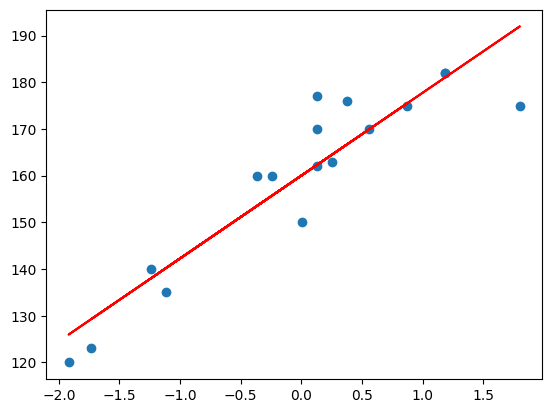

In [240]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color='red')

In [241]:
y_pred_test=regressor.predict(X_test)

In [242]:
y_pred_test

array([[125.99571945],
       [147.97567266],
       [142.48068436],
       [186.44059077],
       [172.15362118],
       [131.49070775]])

In [243]:
y_pred_test, y_test

(array([[125.99571945],
        [147.97567266],
        [142.48068436],
        [186.44059077],
        [172.15362118],
        [131.49070775]]),
     Height
 20     129
 17     159
 3      145
 13     183
 19     167
 16     140)

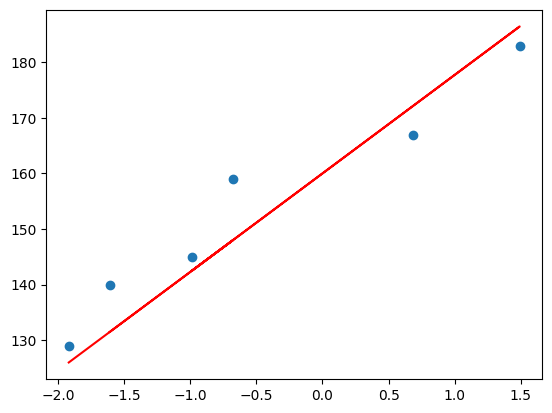

In [244]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')

In [245]:
# 8 Performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [246]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)

In [247]:
print("mse=",mse)
print("mae=", mae)
print("rmse=", rmse)

mse= 41.285662830455514
mae= 5.608571289304838
rmse= 6.425392037102134


In [248]:
# Rsquare=1-ssr/sst
from sklearn.metrics import r2_score

In [249]:
R2=r2_score(y_test, y_pred_test)

In [250]:
print("R_square=", R2)

R_square= 0.8721036174256606


In [251]:
# adjusted r2=1-[(1-R2)*(N-1)/(N-P-1)]
#N=no of observation
#p=no of indepedent feature

# Adjusted R2 always be lesser than the R2

In [252]:
# to get no of independent feature

X_test.shape[1] # N=1

1

In [253]:
Adjusted_R2=1-(1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [254]:
print("Adjusted_R2=",Adjusted_R2)

Adjusted_R2= 0.8401295217820757


In [255]:
# assumption>> 

# 1. X(independent variables) and y(dependent variable) should have linear relationship
# 2. observation should have no relation, if the observation are independent, the error should be independent
# 3. error should have constant variance(homoscedasticity)
# 4 error should have normaly distributed
# 5 the features(independent) should not be related of should have least relation


### 1. X(independent variables) and y(dependent variable) should have linear relationship


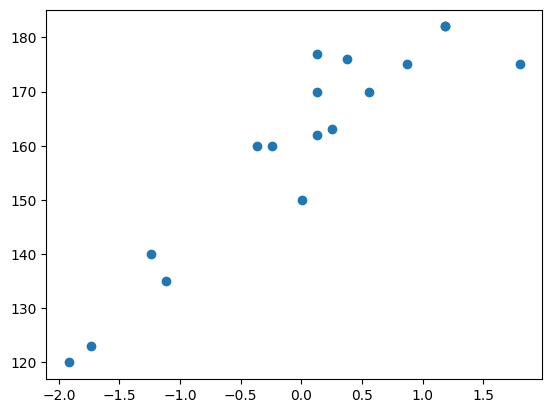

In [256]:
plt.scatter(X_train, y_train)

### 2. observation should have no relation, if the observation are independent, the error should be independent


In [257]:
# residual/error
error=y_test-y_pred_test

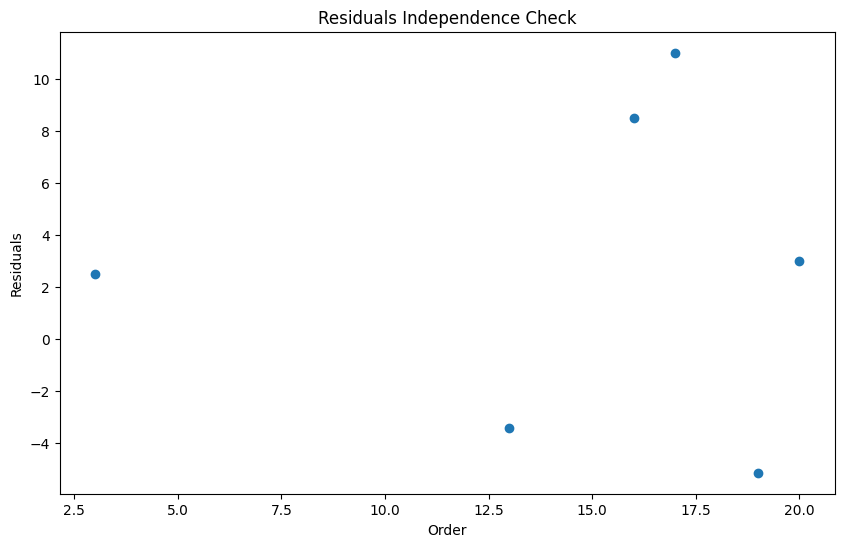

In [258]:
plt.figure(figsize=(10, 6))
plt.plot(error, marker='o', linestyle='')
plt.title('Residuals Independence Check')
plt.xlabel('Order')
plt.ylabel('Residuals')
plt.show()

###  3. error should have constant variance(homoscedasticity)


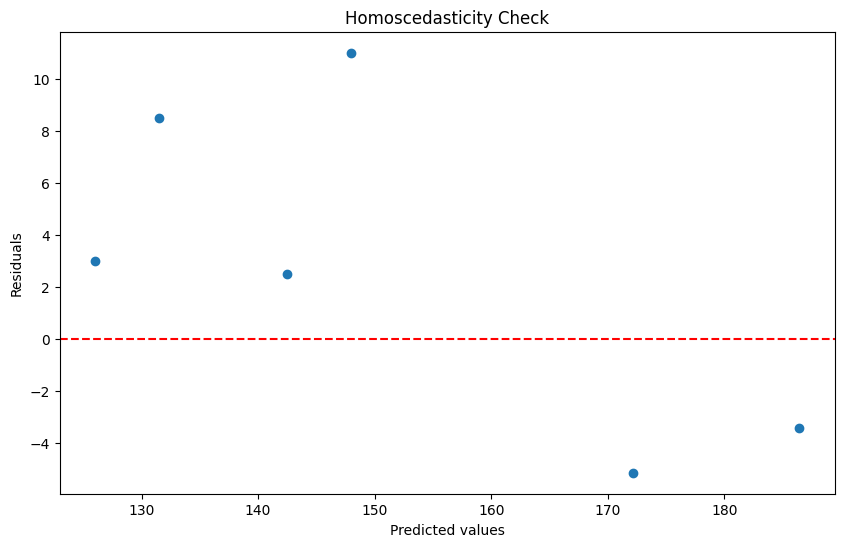

In [268]:
# Residuals vs Fitted values for homoscedasticity check
# not following pattern> it means error have constant variance

plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred_test, y=error)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


### 4 error should have normaly distributed


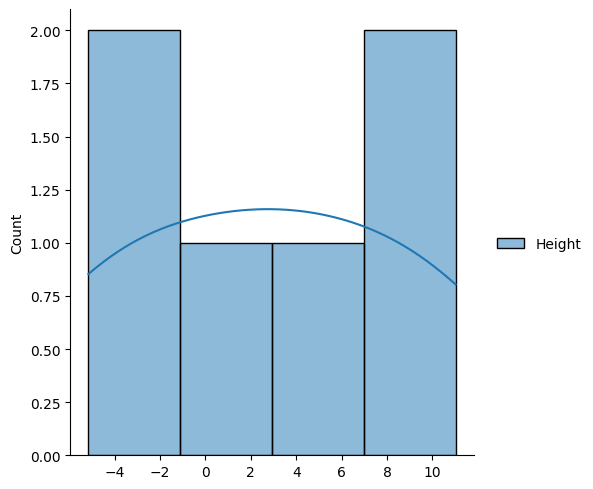

In [272]:
sns.displot(error, kde=True) # here we can see that error is normaly distributed

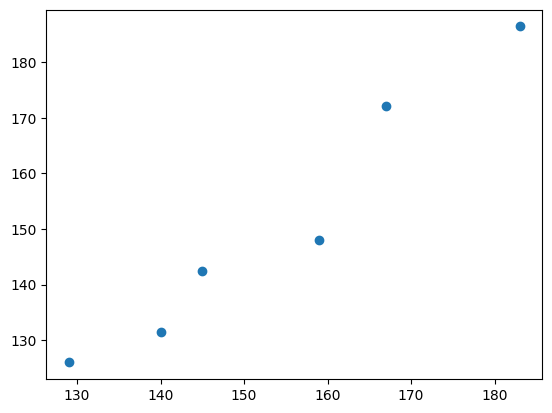

In [259]:
plt.scatter(y_test, y_pred_test)

In [264]:
# keep learning: ... never stop